# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we've modified it to only use two classes (pizza & steak) using the image data modification notebook.

> 🔑 **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up. 

In [3]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-01-26 00:19:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 34.64.4.16, 34.64.4.112, 34.64.4.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|34.64.4.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  9.22MB/s    in 11s     

2023-01-26 00:19:48 (9.31 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [4]:
!ls pizza_steak

test  train


In [5]:
!ls pizza_steak/train

pizza steak


In [6]:
!ls pizza_steak/train/steak

1000205.jpg 1647351.jpg 2238681.jpg 2824680.jpg 3375959.jpg 417368.jpg
100135.jpg  1650002.jpg 2238802.jpg 2825100.jpg 3381560.jpg 4176.jpg
101312.jpg  165639.jpg  2254705.jpg 2826987.jpg 3382936.jpg 42125.jpg
1021458.jpg 1658186.jpg 225990.jpg  2832499.jpg 3386119.jpg 421476.jpg
1032846.jpg 1658443.jpg 2260231.jpg 2832960.jpg 3388717.jpg 421561.jpg
10380.jpg   165964.jpg  2268692.jpg 285045.jpg  3389138.jpg 438871.jpg
1049459.jpg 167069.jpg  2271133.jpg 285147.jpg  3393547.jpg 43924.jpg
1053665.jpg 1675632.jpg 227576.jpg  2855315.jpg 3393688.jpg 440188.jpg
1068516.jpg 1678108.jpg 2283057.jpg 2856066.jpg 3396589.jpg 442757.jpg
1068975.jpg 168006.jpg  2286639.jpg 2859933.jpg 339891.jpg  443210.jpg
1081258.jpg 1682496.jpg 2287136.jpg 286219.jpg  3417789.jpg 444064.jpg
1090122.jpg 1684438.jpg 2291292.jpg 2862562.jpg 3425047.jpg 444709.jpg
1093966.jpg 168775.jpg  229323.jpg  2865730.jpg 3434983.jpg 447557.jpg
1098844.jpg 1697339.jpg 2300534.jpg 2878151.jpg 3435358.jpg 461187.jpg
1100074.jp

In [7]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [8]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically. 

In [1]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [2]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['3553911.jpg']
Image shape: (512, 512, 3)


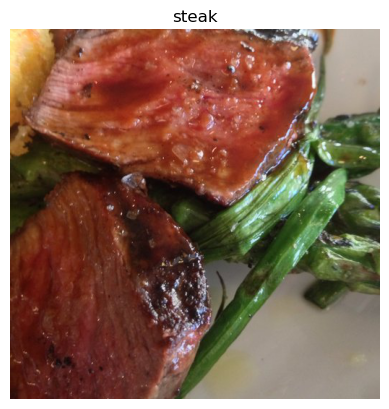

In [3]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

['277963.jpg']
Image shape: (512, 512, 3)


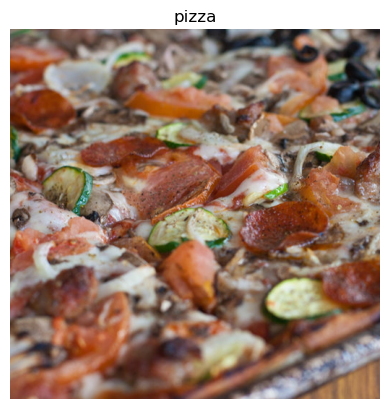

In [4]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [5]:
import tensorflow as tf
tf.constant(img)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-01-26 00:20:22.833915: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-26 00:20:22.834459: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[132, 119, 110],
        [132, 119, 110],
        [130, 120, 108],
        ...,
        [ 36,  31,  35],
        [ 37,  32,  36],
        [ 37,  32,  36]],

       [[133, 120, 111],
        [133, 120, 111],
        [132, 122, 110],
        ...,
        [ 29,  27,  30],
        [ 30,  28,  31],
        [ 30,  28,  31]],

       [[134, 121, 112],
        [132, 122, 112],
        [132, 124, 111],
        ...,
        [ 24,  22,  23],
        [ 25,  23,  24],
        [ 26,  24,  25]],

       ...,

       [[136,  75,  57],
        [136,  75,  57],
        [137,  76,  58],
        ...,
        [149, 112,  86],
        [146, 108,  85],
        [145, 104,  82]],

       [[134,  73,  55],
        [134,  73,  55],
        [135,  74,  56],
        ...,
        [144, 106,  83],
        [143, 105,  84],
        [143, 102,  82]],

       [[132,  70,  55],
        [133,  71,  56],
        [134,  72,  57],
        ...,
        [140, 102,  8

In [6]:
# View the image shape
img.shape # returns width, height, color channels

(512, 512, 3)

In [7]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.51764706, 0.46666667, 0.43137255],
        [0.51764706, 0.46666667, 0.43137255],
        [0.50980392, 0.47058824, 0.42352941],
        ...,
        [0.14117647, 0.12156863, 0.1372549 ],
        [0.14509804, 0.1254902 , 0.14117647],
        [0.14509804, 0.1254902 , 0.14117647]],

       [[0.52156863, 0.47058824, 0.43529412],
        [0.52156863, 0.47058824, 0.43529412],
        [0.51764706, 0.47843137, 0.43137255],
        ...,
        [0.11372549, 0.10588235, 0.11764706],
        [0.11764706, 0.10980392, 0.12156863],
        [0.11764706, 0.10980392, 0.12156863]],

       [[0.5254902 , 0.4745098 , 0.43921569],
        [0.51764706, 0.47843137, 0.43921569],
        [0.51764706, 0.48627451, 0.43529412],
        ...,
        [0.09411765, 0.08627451, 0.09019608],
        [0.09803922, 0.09019608, 0.09411765],
        [0.10196078, 0.09411765, 0.09803922]],

       ...,

       [[0.53333333, 0.29411765, 0.22352941],
        [0.53333333, 0.29411765, 0.22352941],
        [0.5372549 , 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data




In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
                                               
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5


2023-01-26 00:20:23.490944: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-26 00:20:23.721917: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 0.6079 - accuracy: 0.6427

2023-01-26 00:20:29.996863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 8s 137ms/step - loss: 0.6079 - accuracy: 0.6427 - val_loss: 0.4192 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 6s 133ms/step - loss: 0.4333 - accuracy: 0.7980 - val_loss: 0.3369 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 6s 122ms/step - loss: 0.4024 - accuracy: 0.8253 - val_loss: 0.4204 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 6s 121ms/step - loss: 0.3677 - accuracy: 0.8520 - val_loss: 0.2895 - val_accuracy: 0.8780
Epoch 5/5
47/47 [==============================] - 6s 120ms/step - loss: 0.3301 - accuracy: 0.8620 - val_loss: 0.2933 - val_accuracy: 0.8800


> 🔑 **Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure using GPU. 

In [9]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before



In [10]:
# Set random seed
tf.random.set_seed(42)

# Create a modelto replicate the TensorFlow playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5


2023-01-26 00:20:55.288932: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 1.3391 - accuracy: 0.5067

2023-01-26 00:20:58.820986: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 5s 96ms/step - loss: 1.3391 - accuracy: 0.5067 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 4s 91ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 4s 91ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 4s 93ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 4s 88ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [11]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly.

In [12]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but with more layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
histor_3 = model_3.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5


2023-01-26 00:21:17.529556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 4.0477 - accuracy: 0.6047

2023-01-26 00:21:21.793503: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 6s 103ms/step - loss: 4.0477 - accuracy: 0.6047 - val_loss: 1.1459 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 4s 90ms/step - loss: 0.8410 - accuracy: 0.6887 - val_loss: 0.4783 - val_accuracy: 0.7740
Epoch 3/5
47/47 [==============================] - 4s 90ms/step - loss: 0.5795 - accuracy: 0.7300 - val_loss: 0.4321 - val_accuracy: 0.7800
Epoch 4/5
47/47 [==============================] - 4s 89ms/step - loss: 0.5296 - accuracy: 0.7613 - val_loss: 0.5858 - val_accuracy: 0.6740
Epoch 5/5
47/47 [==============================] - 4s 90ms/step - loss: 0.5820 - accuracy: 0.7487 - val_loss: 0.7007 - val_accuracy: 0.6840


In [13]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification: Let's break it down

1. Become one with the data (visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment)

### 1. Become one with the data

['945791.jpg']
Image shape: (512, 512, 3)
['300869.jpg']
Image shape: (384, 512, 3)


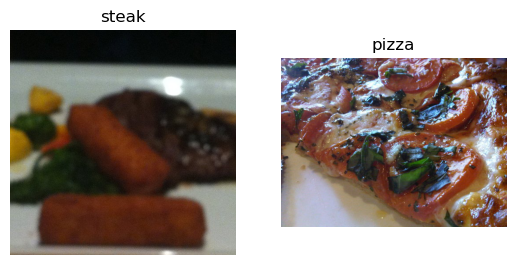

In [14]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [15]:
# Deifne directory dataset paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

Next step is to turn our data into **batches.**

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time. 

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well. 

In [16]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
trian_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [17]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [18]:
# Get a sample of train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [19]:
# How many batches are there?
len(train_data)

47

In [20]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [21]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline. 

> 🔑 **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem). 

In [22]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [23]:
# Create the model (this will be our baseline, a three layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=3, # the size o the sliding window going across an input  
           strides=1, # the size of the step the sliding window takes across an input
           padding="valid",
           activation="relu",
           input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

In [24]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [25]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [26]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [27]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


2023-01-26 00:21:41.073348: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 1.4617 - accuracy: 0.5700

2023-01-26 00:21:47.392280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 8s 151ms/step - loss: 1.4617 - accuracy: 0.5700 - val_loss: 0.5792 - val_accuracy: 0.7360
Epoch 2/5
47/47 [==============================] - 7s 146ms/step - loss: 0.5134 - accuracy: 0.7613 - val_loss: 0.4201 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 7s 154ms/step - loss: 0.4040 - accuracy: 0.8147 - val_loss: 0.4127 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 7s 152ms/step - loss: 0.2658 - accuracy: 0.8980 - val_loss: 0.4978 - val_accuracy: 0.7600
Epoch 5/5
47/47 [==============================] - 8s 160ms/step - loss: 0.1198 - accuracy: 0.9640 - val_loss: 0.5305 - val_accuracy: 0.7760


In [28]:
model_1.evaluate(test_data)

 1/16 [>.............................] - ETA: 3s - loss: 0.2710 - accuracy: 0.8750

2023-01-26 00:22:17.753894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 2s 86ms/step - loss: 0.2933 - accuracy: 0.8800


[0.2932986617088318, 0.8800000548362732]

In [29]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

### 5. Evaluating our model

<AxesSubplot: >

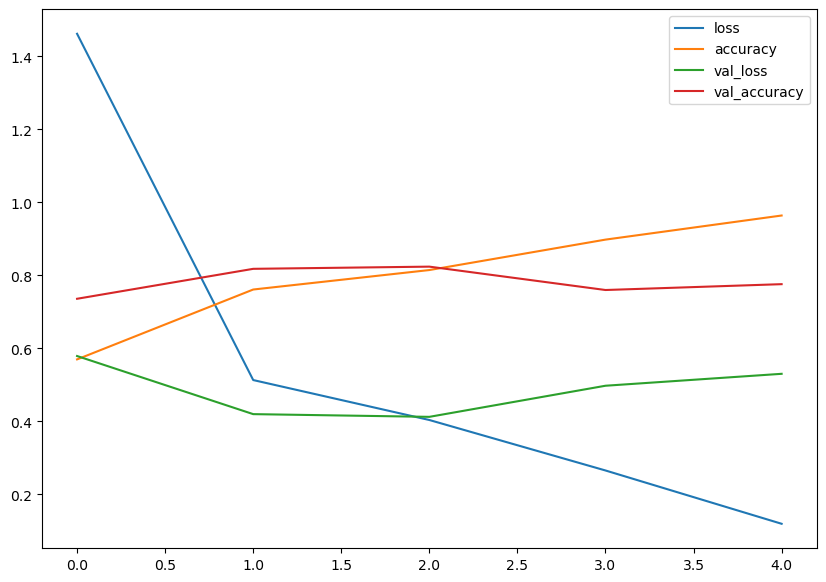

In [30]:
# Plotting the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [31]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrcis.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy") 
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

> 🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.  

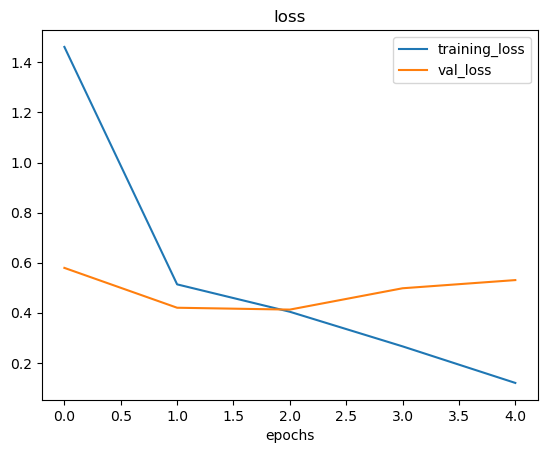

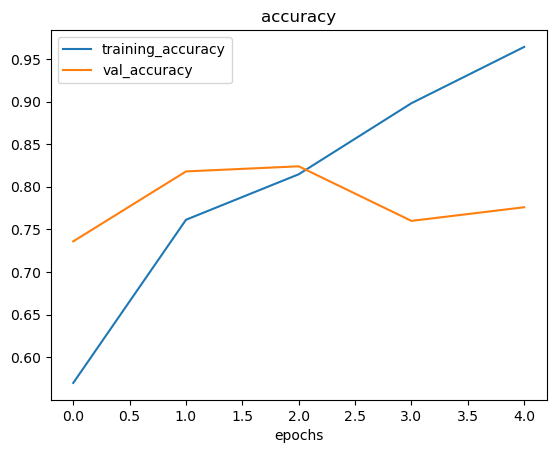

In [32]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

> 🔑 **Note:** Reducing overfitting is also known as **regularization**.

In [33]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [34]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [35]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5


2023-01-26 00:22:20.222872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 0.6209 - accuracy: 0.6433

2023-01-26 00:22:24.557847: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 6s 109ms/step - loss: 0.6209 - accuracy: 0.6433 - val_loss: 0.4583 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 5s 98ms/step - loss: 0.4817 - accuracy: 0.7787 - val_loss: 0.4135 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 5s 95ms/step - loss: 0.4305 - accuracy: 0.8120 - val_loss: 0.3823 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 5s 99ms/step - loss: 0.4102 - accuracy: 0.8267 - val_loss: 0.3426 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 5s 99ms/step - loss: 0.3829 - accuracy: 0.8360 - val_loss: 0.3410 - val_accuracy: 0.8680


In [36]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [37]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


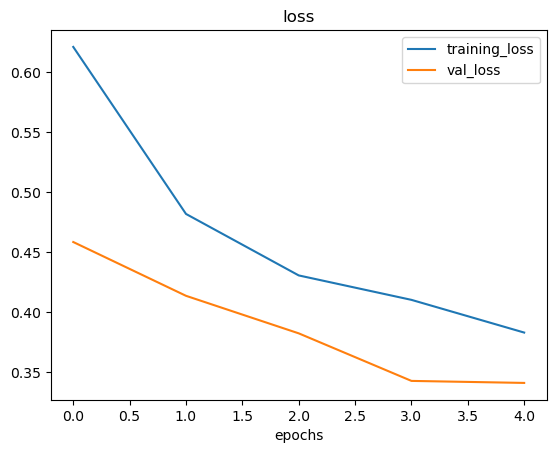

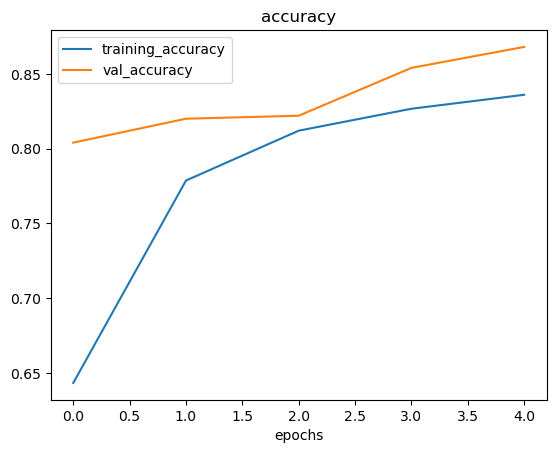

In [38]:
# Plot loss curves
plot_loss_curves(history_5)

### Data augmentation

In [39]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [40]:
# Import data and augment it from training directory
print("Augmented training data:") 
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purposes only

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> 🔑 **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model. 

In [41]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented... only data (images)

showing image number: 26


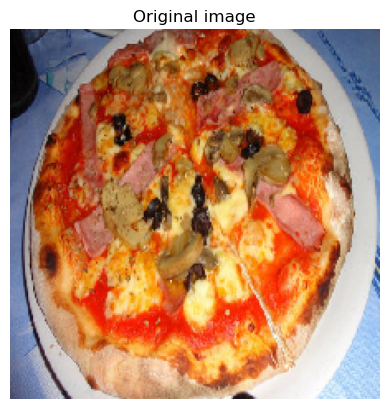

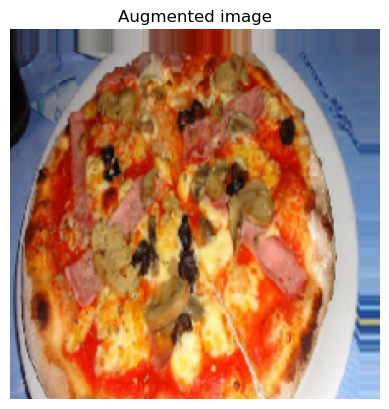

In [42]:
# Show original image and augmented image
random_number = random.randint(0, 31)  # our batch sizes are 32...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [43]:
# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


2023-01-26 00:22:45.747313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 0.7180 - accuracy: 0.4867

2023-01-26 00:22:56.249255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 12s 244ms/step - loss: 0.7180 - accuracy: 0.4867 - val_loss: 0.6850 - val_accuracy: 0.5040
Epoch 2/5
47/47 [==============================] - 12s 252ms/step - loss: 0.6894 - accuracy: 0.5487 - val_loss: 0.6693 - val_accuracy: 0.6340
Epoch 3/5
47/47 [==============================] - 12s 247ms/step - loss: 0.6943 - accuracy: 0.5167 - val_loss: 0.6606 - val_accuracy: 0.7360
Epoch 4/5
47/47 [==============================] - 12s 246ms/step - loss: 0.6446 - accuracy: 0.6807 - val_loss: 1.8635 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 12s 249ms/step - loss: 2.0170 - accuracy: 0.6120 - val_loss: 0.6820 - val_accuracy: 0.5000


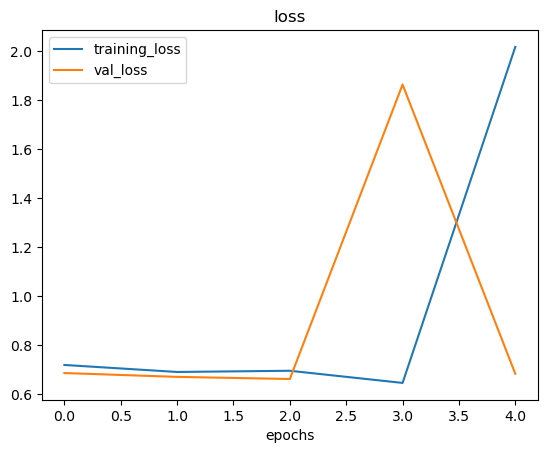

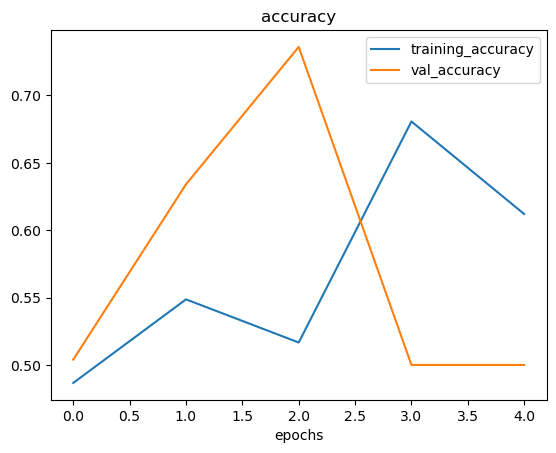

In [44]:
# Check our model's training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) and see what happens.

In [45]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffle = train_datagen_augmented.flow_from_directory(train_dir,
                                                                           target_size=(224, 224),
                                                                           class_mode="binary",
                                                                           batch_size=32,
                                                                           shuffle=True) # this time shuffle data

Found 1500 images belonging to 2 classes.


In [46]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffle, # we're fitting on augmented and shuffled data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffle),
                        validation_data=test_data,
                        validation_steps=len(test_data)) 

Epoch 1/5


2023-01-26 00:23:45.066059: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 0.6697 - accuracy: 0.5973

2023-01-26 00:23:55.694649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 12s 246ms/step - loss: 0.6697 - accuracy: 0.5973 - val_loss: 0.6757 - val_accuracy: 0.5800
Epoch 2/5
47/47 [==============================] - 11s 244ms/step - loss: 0.5754 - accuracy: 0.6947 - val_loss: 0.4283 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 12s 252ms/step - loss: 0.4992 - accuracy: 0.7573 - val_loss: 0.3679 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 11s 244ms/step - loss: 0.4906 - accuracy: 0.7693 - val_loss: 0.3852 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 11s 243ms/step - loss: 0.4837 - accuracy: 0.7700 - val_loss: 0.3641 - val_accuracy: 0.8460


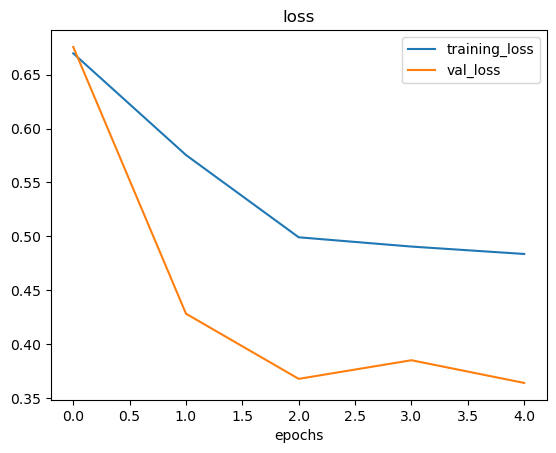

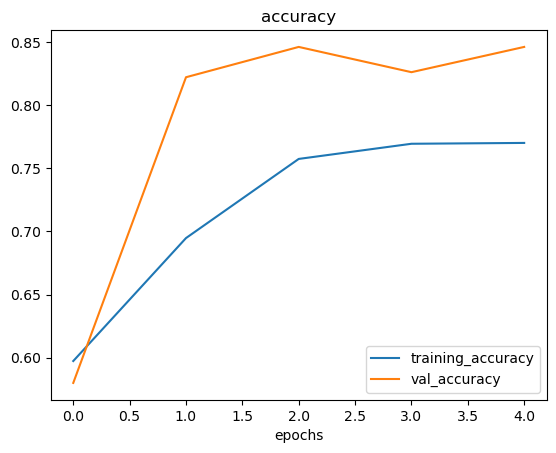

In [47]:
# Plot loss curves
plot_loss_curves(history_7)

> 🔑 **Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images.

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try:

* Increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data
* Use **transfer learning**


In [48]:
# Create a new model
model_new = Sequential([
    Conv2D(32, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(32, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(16, 3, activation="relu"),
    Conv2D(16, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_new.compile(loss="binary_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])

# Fit the model
history_new = model_new.fit(train_data_augmented_shuffle,
                            epochs=5,
                            steps_per_epoch=len(train_data_augmented_shuffle),
                            validation_data=test_data,
                            validation_steps=len(test_data))

Epoch 1/10


2023-01-26 00:24:43.997410: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 0.6556 - accuracy: 0.6140

2023-01-26 00:24:56.151174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 14s 266ms/step - loss: 0.6556 - accuracy: 0.6140 - val_loss: 0.5120 - val_accuracy: 0.7540
Epoch 2/10
47/47 [==============================] - 12s 252ms/step - loss: 0.5809 - accuracy: 0.7040 - val_loss: 0.5751 - val_accuracy: 0.6400
Epoch 3/10
47/47 [==============================] - 12s 249ms/step - loss: 0.5600 - accuracy: 0.7320 - val_loss: 0.4162 - val_accuracy: 0.8180
Epoch 4/10
47/47 [==============================] - 12s 258ms/step - loss: 0.5148 - accuracy: 0.7460 - val_loss: 0.4086 - val_accuracy: 0.8320
Epoch 5/10
47/47 [==============================] - 12s 256ms/step - loss: 0.5074 - accuracy: 0.7473 - val_loss: 0.3782 - val_accuracy: 0.8580
Epoch 6/10
47/47 [==============================] - 12s 251ms/step - loss: 0.4805 - accuracy: 0.7747 - val_loss: 0.3481 - val_accuracy: 0.8640
Epoch 7/10
47/47 [==============================] - 12s 253ms/step - loss: 0.4721 - accuracy: 0.7933 - val_loss: 0.3618 - val_accuracy: 0.8480
Epoch 8/10

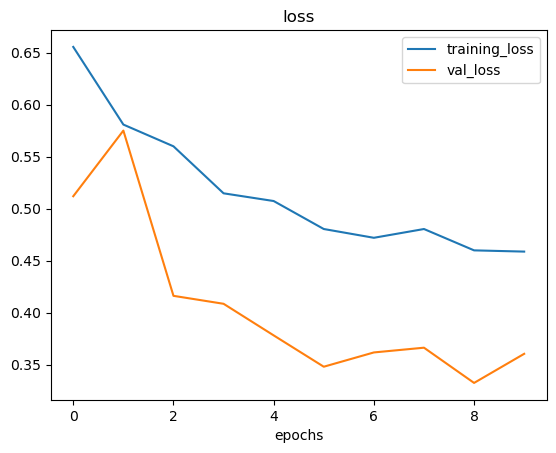

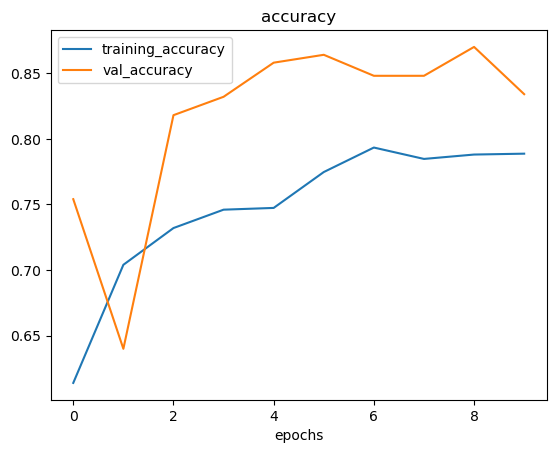

In [49]:
# Plot loss curves
plot_loss_curves(history_new)

## Making a prediction with our trained model on our own custom data

In [50]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2023-01-26 00:26:47--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  8.63MB/s    in 0.2s    

2023-01-26 00:26:48 (8.63 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



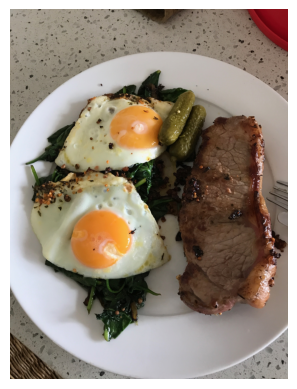

In [51]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [52]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

> 🔑 **Note:** When you train a neural network and you want to make a prediction with it on your own custon data, it's important that your custom data (or new data) is preprocessed into the same format as the data your model was trained on.  

In [53]:
# Create a function to import an image ans resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it 
  to (img_shape, img_shape, color_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [54]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.63774514, 0.62205887, 0.5789216 ],
        [0.6504902 , 0.63186276, 0.58970594],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.0509804 , 0.09019608],
        [0.49509805, 0.04215686, 0.07058824],
        [0.5284314 , 0.07745098, 0.10490197]],

       [[0.66176474, 0.64607847, 0.61078435],
        [0.6387255 , 0.62303925, 0.5759804 ],
        [0.6558824 , 0.632353  , 0.5852941 ],
        ...,
        [0.5352942 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460785],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.65196085, 0.6362746 , 0.5892157 ],
        [0.6392157 , 0.61372554, 0.5676471 ],
        [0.6563726 , 0.6269608 , 0.5828432 ],
        ...,
        [0.5313726 , 0.06470589, 0.08039216],
        [0.52745104, 0.06862745, 0.10000001],
        [0.52254903, 0.05196079, 0.0872549 ]],

       ...,

       [[0.49313727, 0.427451  , 0.31029412],
        [0.05

In [55]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

2023-01-26 00:26:49.892305: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 441ms/step


array([[0.9216402]], dtype=float32)

In [56]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [57]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 11ms/step


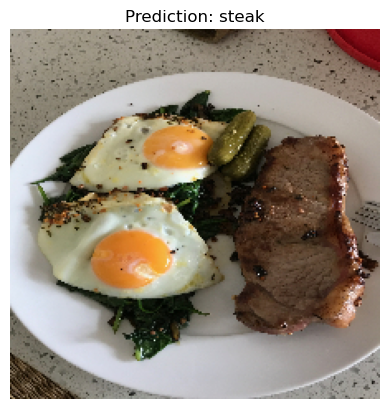

In [58]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

--2023-01-26 00:26:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  8.74MB/s    in 0.3s    

2023-01-26 00:26:51 (8.74 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 11ms/step


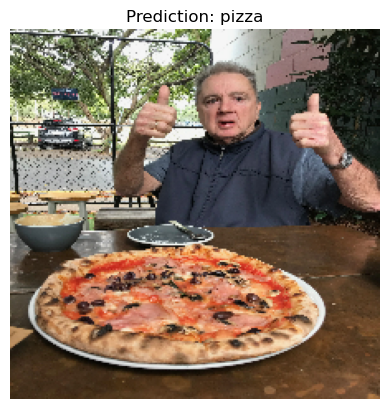

In [59]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

## Multi-class Image Classification

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with the data

In [60]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-01-26 00:26:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 34.64.4.112, 34.64.4.80, 34.64.4.16, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|34.64.4.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  9.40MB/s    in 52s     

2023-01-26 00:27:45 (9.46 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [61]:
import os
# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 

In [62]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [63]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1665654.jpg']
Image shape: (384, 512, 3)


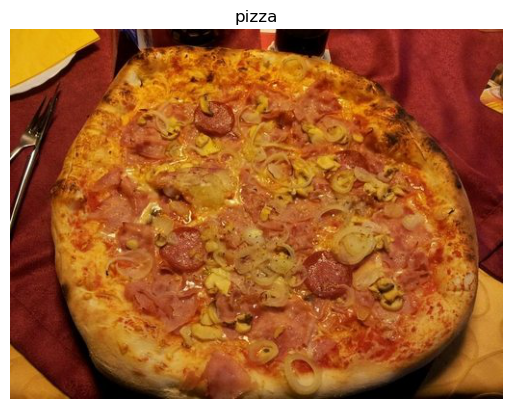

In [64]:
# Visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

Creating a baseline CNN model based on CNN explainer website (also on 10 classes)

In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model (very similar to previous models but actually the same as CNN explainer website)
model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### 4. Fit a model

In [67]:
# Fit the model
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


2023-01-26 00:27:49.959149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - ETA: 0s - loss: 2.2258 - accuracy: 0.1713

2023-01-26 00:28:14.441928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 31s 128ms/step - loss: 2.2258 - accuracy: 0.1713 - val_loss: 2.0697 - val_accuracy: 0.2612
Epoch 2/5
235/235 [==============================] - 29s 121ms/step - loss: 1.8726 - accuracy: 0.3511 - val_loss: 1.9218 - val_accuracy: 0.3228
Epoch 3/5
235/235 [==============================] - 28s 120ms/step - loss: 1.4384 - accuracy: 0.5135 - val_loss: 1.9959 - val_accuracy: 0.3216
Epoch 4/5
235/235 [==============================] - 28s 120ms/step - loss: 0.9007 - accuracy: 0.7096 - val_loss: 2.4661 - val_accuracy: 0.2864
Epoch 5/5
235/235 [==============================] - 28s 120ms/step - loss: 0.3713 - accuracy: 0.8851 - val_loss: 3.9300 - val_accuracy: 0.2636


### 5. Evaluate the model

In [68]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 5s 69ms/step - loss: 3.9300 - accuracy: 0.2636


[3.9300315380096436, 0.26360002160072327]

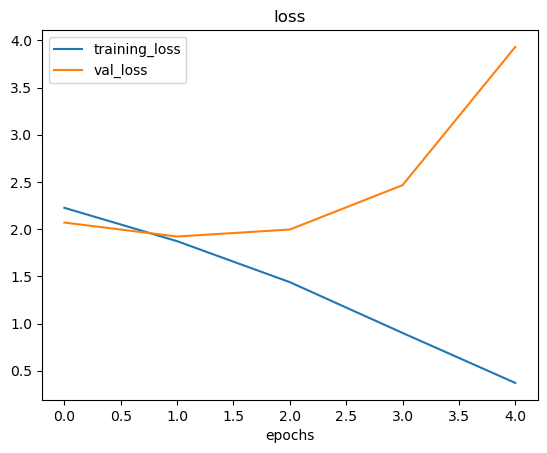

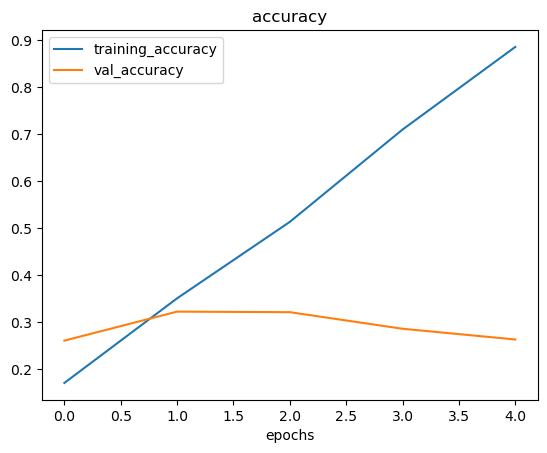

In [69]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_8)

What do these loss curves tell us?

It seems our model is **overfitting** the training set quite badly - it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset.

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on you own dataset. 

In [70]:
# How about we try and simplify the model first
# Remove 2 convolutional layers
model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [71]:
# Fit the model with 2x conv layers removed
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


2023-01-26 00:30:19.796462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - ETA: 0s - loss: 2.1455 - accuracy: 0.2477

2023-01-26 00:30:37.347926: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 23s 98ms/step - loss: 2.1455 - accuracy: 0.2477 - val_loss: 1.9348 - val_accuracy: 0.3352
Epoch 2/5
235/235 [==============================] - 23s 96ms/step - loss: 1.7787 - accuracy: 0.3923 - val_loss: 1.9083 - val_accuracy: 0.3384
Epoch 3/5
235/235 [==============================] - 23s 97ms/step - loss: 1.3917 - accuracy: 0.5465 - val_loss: 1.9913 - val_accuracy: 0.3176
Epoch 4/5
235/235 [==============================] - 23s 97ms/step - loss: 0.9170 - accuracy: 0.7148 - val_loss: 2.3588 - val_accuracy: 0.3024
Epoch 5/5
235/235 [==============================] - 23s 96ms/step - loss: 0.5497 - accuracy: 0.8351 - val_loss: 2.8283 - val_accuracy: 0.2596


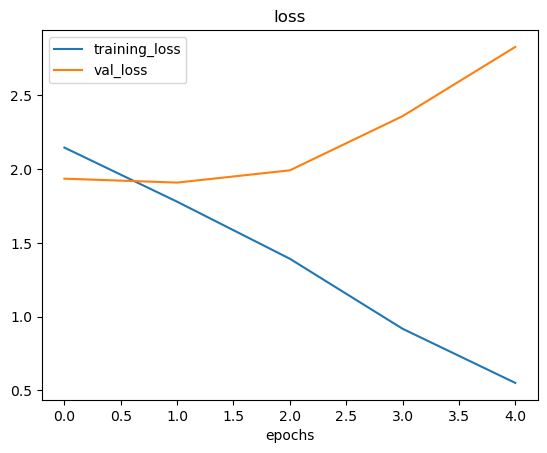

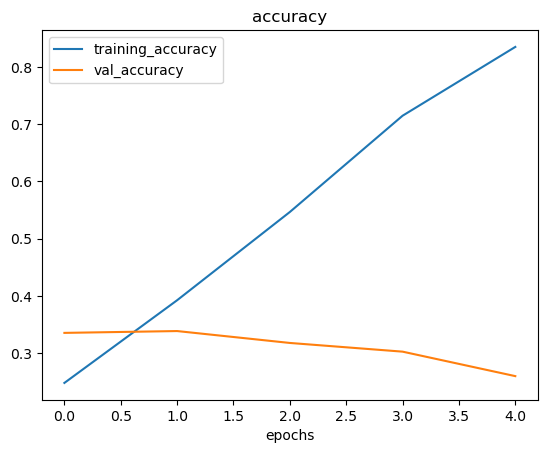

In [72]:
# Check out the loss curves of model_9
plot_loss_curves(history_9)

In [73]:
model_9.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 29160)             0         
                                                                 
 dense_14 (Dense)            (None, 10)               

"Simplifying the model" didn't work -> Let's try data augmentation

### Trying to reduce overfitting with data augmentation

What we want:
* Reduce overfitting
* Improve validation accuracy

In [74]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [75]:
# Let's create another model but this time we'll fit it on the augmented training data of 10 classes
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model (using the same setup as previous models)
model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [76]:
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5


2023-01-26 00:32:14.970555: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - ETA: 0s - loss: 2.2508 - accuracy: 0.1587

2023-01-26 00:33:07.526337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 59s 247ms/step - loss: 2.2508 - accuracy: 0.1587 - val_loss: 2.1389 - val_accuracy: 0.1924
Epoch 2/5
235/235 [==============================] - 57s 242ms/step - loss: 2.1627 - accuracy: 0.1895 - val_loss: 2.0330 - val_accuracy: 0.2556
Epoch 3/5
235/235 [==============================] - 56s 240ms/step - loss: 2.0979 - accuracy: 0.2507 - val_loss: 1.9599 - val_accuracy: 0.3232
Epoch 4/5
235/235 [==============================] - 58s 245ms/step - loss: 2.0304 - accuracy: 0.2823 - val_loss: 1.9067 - val_accuracy: 0.3392
Epoch 5/5
235/235 [==============================] - 58s 248ms/step - loss: 1.9856 - accuracy: 0.3052 - val_loss: 1.8382 - val_accuracy: 0.3584


In [77]:
model_8.evaluate(test_data)

79/79 [==============================] - 6s 73ms/step - loss: 3.9300 - accuracy: 0.2636


[3.930030584335327, 0.26360002160072327]

In [78]:
model_10.evaluate(test_data)

79/79 [==============================] - 6s 73ms/step - loss: 1.8382 - accuracy: 0.3584


[1.8382407426834106, 0.35840001702308655]

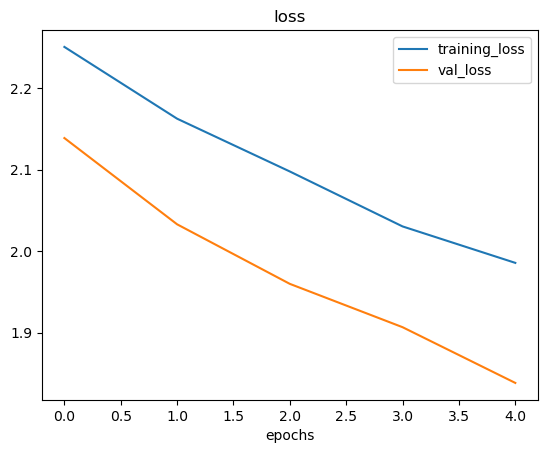

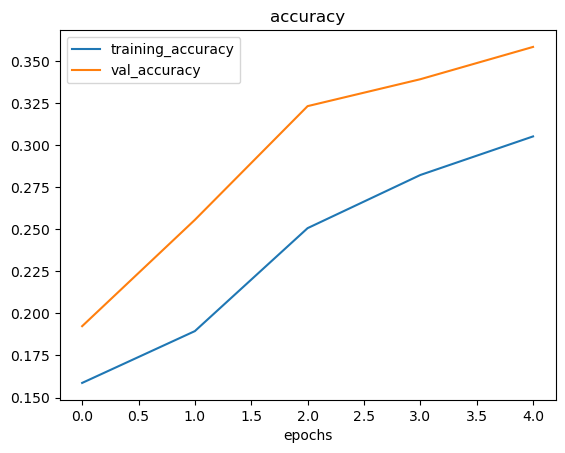

In [79]:
# Check out our model trained on augmented data's loss curves
plot_loss_curves(history_10)

### 7. Repeat until satisfied

- Restructuring our model's architecture (increasing layers/hidden units)
- Adjust the learning rate
- Try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- Training for longer (e.g. 10 epochs instead of 5 epochs)
- Try **transfer learning**

### Making a prediction with our trained model 

In [87]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [80]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg


--2023-01-26 01:02:56--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  8.82MB/s    in 0.3s    

2023-01-26 01:02:57 (8.82 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2023-01-26 01:02:57--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting

In [85]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1: # this means multi-class
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

2023-01-26 01:09:07.518182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 392ms/step


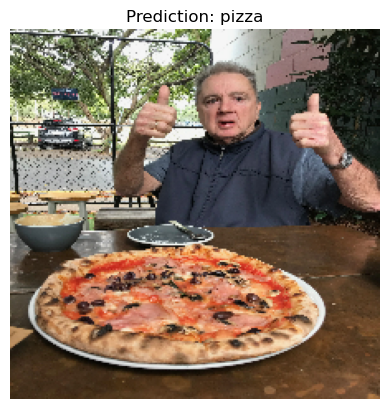

In [88]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 20ms/step


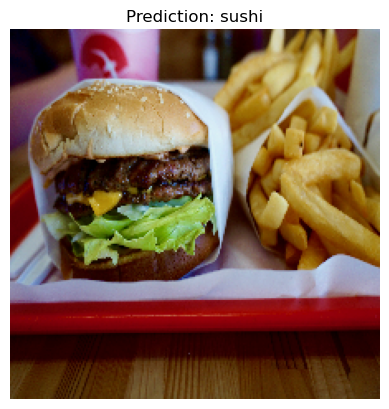

In [91]:
pred_and_plot(model=model_10,
              filename="03-hamburger.jpeg",
              class_names=class_names)

Looks like our model didn't perform very well on our custom images but this is because it only achieved ~39% accuracy on the test data. So we can expect it to function quite poorly on other unseen data. 

## Saving and loading our model

In [92]:
# Save a model
model_10.save("saved_trained_model_10")

INFO:tensorflow:Assets written to: saved_trained_model_10/assets


INFO:tensorflow:Assets written to: saved_trained_model_10/assets


In [94]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

2023-01-26 01:13:56.945996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


79/79 [==============================] - 6s 74ms/step - loss: 1.8382 - accuracy: 0.3584


[1.8382399082183838, 0.35840001702308655]

In [95]:
# Compare our loaded model to our existing model
model_10.evaluate(test_data)

79/79 [==============================] - 6s 74ms/step - loss: 1.8382 - accuracy: 0.3584


[1.8382413387298584, 0.35840001702308655]